In [1]:
#import dependencies
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress

In [2]:
#API call for vehicles
url_vehicles = "http://swapi.dev/api/vehicles/" 
vehicles_response = requests.get(url_vehicles).json()

In [3]:
#create list of vehicle data
vehicles_list = []
page = ["1", "2", "3", "4"]
url_vehicles_next = f"http://swapi.dev/api/vehicles/?page="

for x in page:
    vehicles_response_next = requests.get(url_vehicles_next + x).json()
    
#for loop to list vehicle names
    for vehicles in vehicles_response_next["results"]:
        vehicle_name = vehicles["name"]
        vehicles_list.append(vehicle_name)

In [4]:
# count vehicles in list
vehicles_count = vehicles_response["count"]
print(f"There are {vehicles_count} vehicles in this API.")

There are 39 vehicles in this API.


In [5]:
##Set url for API
url_vehicles = 'https://swapi.dev/api/vehicles/?search='
search_vehicles = vehicles_list

#Set empty lists to hold vehicle's stats
length = []
max_atmosphering_speed = []
cargo_capacity = []
cost_in_credits = []
starwars_vehicles = []

#Loop through each vehicle and make API request
for vehicles in search_vehicles:
    
    # Create search query, make request and store in json
    query = url_vehicles + vehicles
    response = requests.get(query)
    response_json = response.json()
    
    
    # stats of vehicles 
    try:
        length.append(response_json['results'][0]['length'])
        max_atmosphering_speed.append(response_json['results'][0]['max_atmosphering_speed'])
        cargo_capacity.append(response_json['results'][0]['cargo_capacity'])
        cost_in_credits.append(response_json['results'][0]['cost_in_credits'])
        starwars_vehicles.append(vehicles)
        print(f"{vehicles} found! ")
        
   
    # exceptions for vehicles not available in the Star Wars API
    except: 
        print(f"{vehicles} not found")
        pass

Sand Crawler found! 
T-16 skyhopper found! 
X-34 landspeeder found! 
TIE/LN starfighter found! 
Snowspeeder found! 
TIE bomber found! 
AT-AT found! 
AT-ST found! 
Storm IV Twin-Pod cloud car found! 
Sail barge found! 
Bantha-II cargo skiff found! 
TIE/IN interceptor found! 
Imperial Speeder Bike found! 
Vulture Droid found! 
Multi-Troop Transport found! 
Armored Assault Tank found! 
Single Trooper Aerial Platform found! 
C-9979 landing craft found! 
Tribubble bongo found! 
Sith speeder found! 
Zephyr-G swoop bike found! 
Koro-2 Exodrive airspeeder found! 
XJ-6 airspeeder found! 
LAAT/i found! 
LAAT/c found! 
AT-TE found! 
SPHA found! 
Flitknot speeder found! 
Neimoidian shuttle found! 
Geonosian starfighter found! 
Tsmeu-6 personal wheel bike found! 
Emergency Firespeeder found! 
Droid tri-fighter found! 
Oevvaor jet catamaran found! 
Raddaugh Gnasp fluttercraft found! 
Clone turbo tank found! 
Corporate Alliance tank droid found! 
Droid gunship found! 
AT-RT found! 


In [6]:
#create new dataframe for all vehicle size found
vehicles_size_df = pd.DataFrame({"Vehicle": search_vehicles,
                            "Length": length})
vehicles_size_df

,Vehicle,Length
0,Sand Crawler,36.8
1,T-16 skyhopper,10.4
2,X-34 landspeeder,3.4
3,TIE/LN starfighter,6.4
4,Snowspeeder,4.5
5,TIE bomber,7.8
6,AT-AT,20
7,AT-ST,2
8,Storm IV Twin-Pod cloud car,7
9,Sail barge,30


In [7]:
#drop vehicles sizes without stats listed & outliers (C-9979 landing craft & SPHA), then create a cleaner dataframe 
clean_vehicles_size_df = vehicles_size_df.drop(vehicles_size_df[vehicles_size_df['Length'] == 'unknown'].index) 
clean_vehicles_size_df = clean_vehicles_size_df.drop(clean_vehicles_size_df[clean_vehicles_size_df["Vehicle"] == "C-9979 landing craft"].index)
clean_vehicles_size_df = clean_vehicles_size_df.drop(clean_vehicles_size_df[clean_vehicles_size_df["Vehicle"] == "SPHA"].index)

clean_vehicles_size_df

,Vehicle,Length
0,Sand Crawler,36.8
1,T-16 skyhopper,10.4
2,X-34 landspeeder,3.4
3,TIE/LN starfighter,6.4
4,Snowspeeder,4.5
5,TIE bomber,7.8
6,AT-AT,20
7,AT-ST,2
8,Storm IV Twin-Pod cloud car,7
9,Sail barge,30


In [8]:
# sort dataframe vehicle length by ascending order
clean_vehicles_size_df["Length"] = clean_vehicles_size_df["Length"].astype(float)
length_df = clean_vehicles_size_df.sort_values("Length", ascending=True)
length_df

,Vehicle,Length
19,Sith speeder,1.50
27,Flitknot speeder,2.00
16,Single Trooper Aerial Platform,2.00
7,AT-ST,2.00
12,Imperial Speeder Bike,3.00
38,AT-RT,3.20
2,X-34 landspeeder,3.40
30,Tsmeu-6 personal wheel bike,3.50
13,Vulture Droid,3.50
20,Zephyr-G swoop bike,3.68


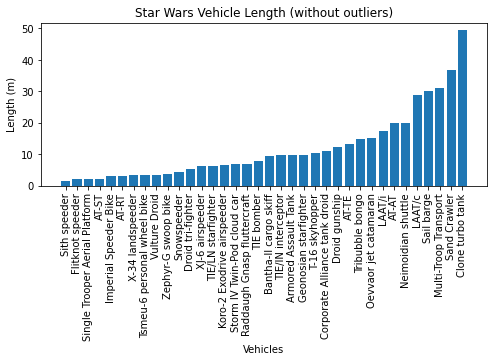

In [9]:
## create a bar chart for vehicle size
tick_locations = [value for value in clean_vehicles_size_df["Vehicle"]]
labels = clean_vehicles_size_df["Vehicle"]
plt.figure(figsize=(8, 3))
plt.bar(length_df["Vehicle"], length_df["Length"])
plt.xticks(tick_locations, labels, rotation="vertical")
plt.ylabel("Length (m)")
plt.xlabel("Vehicles")
plt.title("Star Wars Vehicle Length (without outliers)")
plt.savefig("Vehicles_Images_EE/ee_Bar_Vehicle_Length.png", bbox_inches = "tight")
plt.show()

In [10]:
# create new dataframe for all vehicle speed found
vehicles_speed_df = pd.DataFrame({"Vehicle": search_vehicles,
                            "Max Atmosphering Speed": max_atmosphering_speed,
                            })
vehicles_speed_df

,Vehicle,Max Atmosphering Speed
0,Sand Crawler,30
1,T-16 skyhopper,1200
2,X-34 landspeeder,250
3,TIE/LN starfighter,1200
4,Snowspeeder,650
5,TIE bomber,850
6,AT-AT,60
7,AT-ST,90
8,Storm IV Twin-Pod cloud car,1500
9,Sail barge,100


In [11]:
# drop vehicle speeds without stats listed & outliers (Geonosian starfighter & Storm IV Twin-Pod cloud car), then create a cleaner dataframe
clean_vehicles_speed_df = vehicles_speed_df.drop(vehicles_speed_df[vehicles_speed_df['Max Atmosphering Speed'] == 'unknown'].index) 
clean_vehicles_speed_df = clean_vehicles_speed_df.drop(clean_vehicles_speed_df[clean_vehicles_speed_df["Vehicle"] == "Geonosian starfighter"].index)
clean_vehicles_speed_df = clean_vehicles_speed_df.drop(clean_vehicles_speed_df[clean_vehicles_speed_df["Vehicle"] == "Storm IV Twin-Pod cloud car"].index)

clean_vehicles_speed_df

,Vehicle,Max Atmosphering Speed
0,Sand Crawler,30
1,T-16 skyhopper,1200
2,X-34 landspeeder,250
3,TIE/LN starfighter,1200
4,Snowspeeder,650
5,TIE bomber,850
6,AT-AT,60
7,AT-ST,90
9,Sail barge,100
10,Bantha-II cargo skiff,250


In [12]:
# sort dataframe vehicle speed by ascending order
clean_vehicles_speed_df["Max Atmosphering Speed"] = clean_vehicles_speed_df["Max Atmosphering Speed"].astype(float)
speed_df = clean_vehicles_speed_df.sort_values("Max Atmosphering Speed", ascending=True)
speed_df

,Vehicle,Max Atmosphering Speed
0,Sand Crawler,30.0
26,SPHA,35.0
14,Multi-Troop Transport,35.0
15,Armored Assault Tank,55.0
25,AT-TE,60.0
6,AT-AT,60.0
18,Tribubble bongo,85.0
7,AT-ST,90.0
38,AT-RT,90.0
36,Corporate Alliance tank droid,100.0


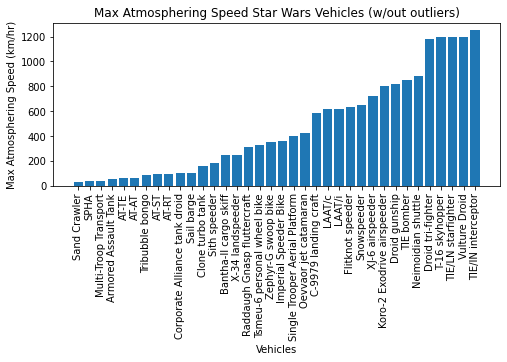

In [13]:
## create a bar chart for vehicle speed
tick_locations = [value for value in clean_vehicles_speed_df["Vehicle"]]
labels = clean_vehicles_speed_df["Vehicle"]
plt.figure(figsize=(8, 3))
plt.bar(speed_df["Vehicle"], speed_df["Max Atmosphering Speed"])
plt.xticks(tick_locations, labels, rotation="vertical")
plt.ylabel("Max Atmosphering Speed (km/hr)")
plt.xlabel("Vehicles")
plt.title("Max Atmosphering Speed Star Wars Vehicles (w/out outliers)")
plt.savefig("Vehicles_Images_EE/ee_Bar_Vehicle_Speed.png", bbox_inches = "tight")
plt.show()

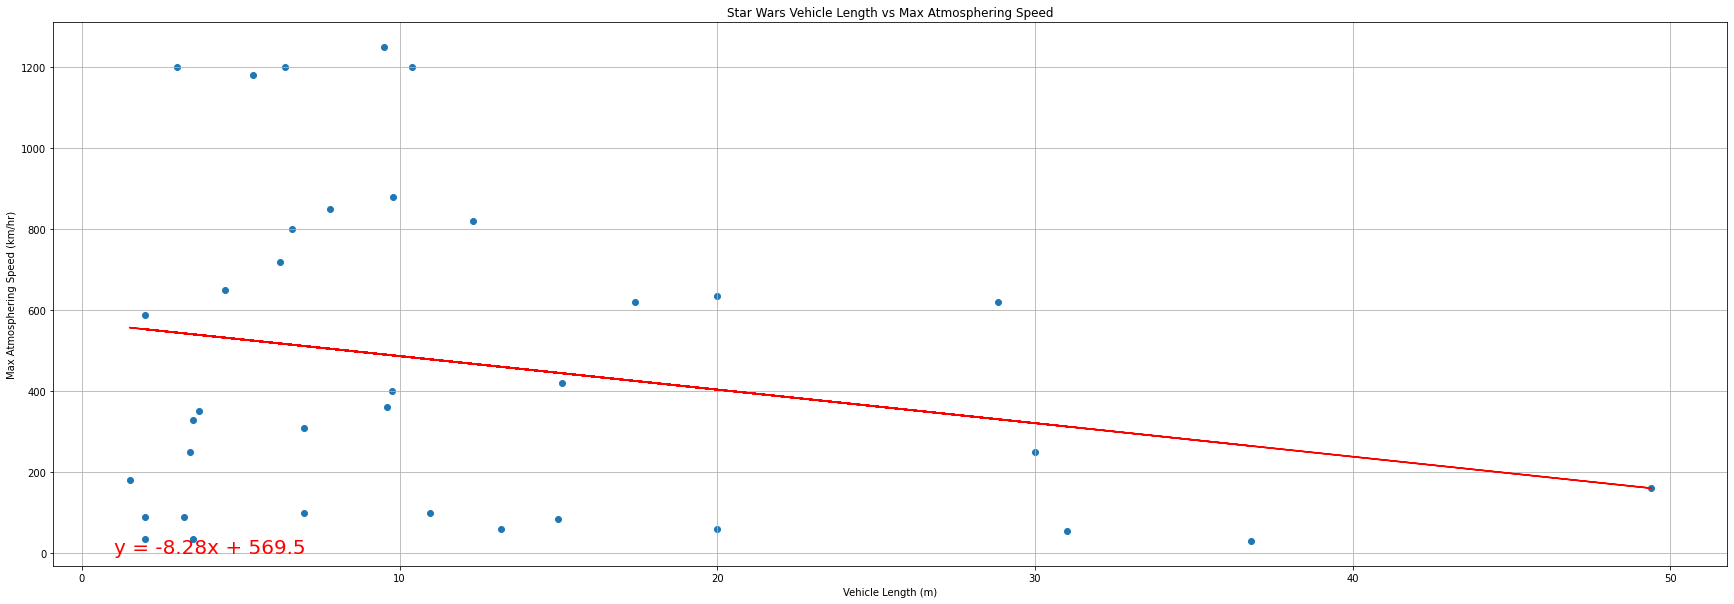

The r-squared is: 0.05279925263345595


In [14]:
#scatter plot of cleaned vehicle length vs speed
x_values = clean_vehicles_size_df["Length"]
y_values = clean_vehicles_speed_df["Max Atmosphering Speed"].astype(float)

#regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(30,10))
plt.scatter(x_values, y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,1),fontsize=20,color="red")
plt.grid()
plt.title("Star Wars Vehicle Length vs Max Atmosphering Speed")
plt.xlabel("Vehicle Length (m)")
plt.ylabel("Max Atmosphering Speed (km/hr)")
plt.savefig("Vehicles_Images_EE/ee_Scatter_Vehicle_LengthVsSpeed.png", bbox_inches = "tight")
plt.show()

#coefficient of determination
r_squared = rvalue**2
print(f"The r-squared is: {r_squared}")

In [15]:
# analysis
smallest_vehicle = length_df.loc[0, :]
smallest_vehicle_name = smallest_vehicle["Vehicle"]
largest_vehicle = length_df.loc[len(length_df)-1, :]
largest_vehicle_name = largest_vehicle["Vehicle"]
slowest_vehicle = speed_df.loc[0, :]
slowest_vehicle_name = slowest_vehicle["Max Atmosphering Speed"]
fastest_vehicle = speed_df.loc[len(speed_df)-1, :]
fastest_vehicle_name = fastest_vehicle["Max Atmosphering Speed"]

average_length = length_df["Length"].mean()
average_speed = speed_df["Max Atmosphering Speed"].mean()

average_length_vs_average_speed = average_length / average_speed * 1000

r_sq = r_squared * 100

In [16]:
# inferences from analysis
print(f"The average length of a Star Wars vehicle is {round(average_length, 2)} m.")
print(f"The average maximum atmosphering speed of a Star Wars vehicle is {round(average_speed, 2)} km/hr.")
print(f"The average length of a Star Wars vehicle vs. the average speed is {round(average_length_vs_average_speed, 2)}/hr.")

print(f"The adjusted R-squared value is around {round(r_sq, 3)}%.")

The average length of a Star Wars vehicle is 11.88 m.
The average maximum atmosphering speed of a Star Wars vehicle is 471.14 km/hr.
The average length of a Star Wars vehicle vs. the average speed is 25.22/hr.
The adjusted R-squared value is around 5.28%.
